In [1]:
from IPython.core.display import HTML

In [2]:
styles = open('/Users/lyndon/AnacondaProjects/Style.css').read()
HTML(styles)

## 用 Python 进行中文文本分析
---

> 内容介绍
   - 了解中文自然语言处理Python库：PyNLPIR, [jieba](https://github.com/fxsjy/jieba), [BosonNLP](https://bosonnlp.com/),  [THU系列](http://nlp.csai.tsinghua.edu.cn/site2/), [FudanNLP](https://github.com/FudanNLP), [哈工大语言云](https://www.ltp-cloud.com/)
   - 以PyNLPIR为例，了解分词、提取关键词、自定义词典
   - 词语共现
   - 文本聚类

In [3]:
# 查看安装的Python版本
!python --version

Python 2.7.14 :: Anaconda, Inc.


### 认识PyNLPIR
- [NLPIR汉语分词系统](http://ictclas.nlpir.org/)
    - 主要功能：中文分词；词性标注；命名实体识别；用户词典功能
    - 支持编码：GBK、UTF-8、Big 5，[编码对比](http://m.jb51.net/article/17968.htm)
- [工具下载](https://github.com/NLPIR-team/NLPIR)
- [在线测试](http://ictclas.nlpir.org/nlpir/)
- 特别适合处理微博数据

In [4]:
# 导入PyNLPIR并初始化PyNLPIR API
import pynlpir
pynlpir.open()

In [5]:
# 分词与词性标注
# 详细词性(Part of Speech)对照表：https://github.com/tsroten/pynlpir/blob/develop/docs/pos_map.rst
s = '@金兼斌:四月的最后一个周末，紫荆已谢，牡丹正盛；清春已去，暑气徐来。\
五一假期前后，清华北大先后迎来校庆。\
https://wx4.sinaimg.cn/mw690/6480341ely1ff38dysggaj20hy0amdhp.jpg \
4月29日 08:12 来自 weibo.com \
[收藏] [转发]0 [评论]0 [赞]20'
# pos_tagging: True/False
segments = pynlpir.segment(s, pos_tagging=True)
print segments

[(u'@\u91d1\u517c\u658c', u'noun'), (u':', u'punctuation mark'), (u'\u56db\u6708', u'time word'), (u'\u7684', u'particle'), (u'\u6700\u540e', u'noun of locality'), (u'\u4e00\u4e2a', u'numeral'), (u'\u5468\u672b', u'time word'), (u'\uff0c', u'punctuation mark'), (u'\u7d2b\u8346', u'noun'), (u'\u5df2', u'adverb'), (u'\u8c22', u'verb'), (u'\uff0c', u'punctuation mark'), (u'\u7261\u4e39', u'noun'), (u'\u6b63', u'adverb'), (u'\u76db', u'verb'), (u'\uff1b', u'punctuation mark'), (u'\u6e05\u6625', u'noun'), (u'\u5df2', u'adverb'), (u'\u53bb', u'verb'), (u'\uff0c', u'punctuation mark'), (u'\u6691\u6c14', u'noun'), (u'\u5f90', u'adjective'), (u'\u6765', u'verb'), (u'\u3002', u'punctuation mark'), (u'\u4e94\u4e00', u'time word'), (u'\u5047\u671f', u'time word'), (u'\u524d\u540e', u'noun of locality'), (u'\uff0c', u'punctuation mark'), (u'\u6e05\u534e', u'noun'), (u'\u5317\u5927', u'noun'), (u'\u5148\u540e', u'adverb'), (u'\u8fce\u6765', u'verb'), (u'\u6821\u5e86', u'noun'), (u'\u3002', u'punctua

> 如果执行上一步出现报错，[原因](https://github.com/tsroten/pynlpir/issues/57)在于源文件
(以我的Mac为例，`/Users/lyndon/anaconda2/lib/python2.7/site-packages/pynlpir/Data`)
里的`.user`文件未及时更新，最新的源文件从[此处](https://github.com/NLPIR-team/NLPIR/tree/master/License/license%20for%20a%20month/NLPIR-ICTCLAS分词系统授权)下载，之后重启后继续执行

In [6]:
# 输出可读结果，并去除空格
# 可以看出，PyNLPIR可以将微博文本中的用户名、链接、[转发]、[评论]、[赞]提取出来
for segment in segments:
    if segment[0] != ' ':
        print segment[0], segment[1]

@金兼斌 noun
: punctuation mark
四月 time word
的 particle
最后 noun of locality
一个 numeral
周末 time word
， punctuation mark
紫荆 noun
已 adverb
谢 verb
， punctuation mark
牡丹 noun
正 adverb
盛 verb
； punctuation mark
清春 noun
已 adverb
去 verb
， punctuation mark
暑气 noun
徐 adjective
来 verb
。 punctuation mark
五一 time word
假期 time word
前后 noun of locality
， punctuation mark
清华 noun
北大 noun
先后 adverb
迎来 verb
校庆 noun
。 punctuation mark
https://wx4.sinaimg.cn/mw690/6480341ely1ff38dysggaj20hy0amdhp.jpg string
4月 time word
29日 time word
08:12 numeral
来自 verb
weibo.com noun
[收藏] string
[转发] string
0 numeral
[评论] string
0 numeral
[赞] string
20 numeral


In [7]:
# 输出更为详细的词性信息
# parent: 最顶级词性；child: 词性具体信息
# pronoun(parent): personal pronoun(child)
segments = pynlpir.segment(s, pos_names='all')
# 循环
for segment in segments:
    # 逻辑判断
    if segment[0] != ' ':
        print segment[0], segment[1]

@金兼斌 noun:personal name
: punctuation mark:dash
四月 time word
的 particle:particle 的/底
最后 noun of locality
一个 numeral:numeral-plus-classifier compound
周末 time word
， punctuation mark:comma
紫荆 noun
已 adverb
谢 verb
， punctuation mark:comma
牡丹 noun
正 adverb
盛 verb
； punctuation mark:semicolon
清春 noun:personal name:Chinese given name
已 adverb
去 verb:directional verb
， punctuation mark:comma
暑气 noun
徐 adjective:adjective morpheme
来 verb:directional verb
。 punctuation mark:period
五一 time word
假期 time word
前后 noun of locality
， punctuation mark:comma
清华 noun:other proper noun
北大 noun
先后 adverb
迎来 verb
校庆 noun
。 punctuation mark:period
https://wx4.sinaimg.cn/mw690/6480341ely1ff38dysggaj20hy0amdhp.jpg string:URL
4月 time word
29日 time word
08:12 numeral
来自 verb
weibo.com noun
[收藏] string:emoticon
[转发] string:emoticon
0 numeral
[评论] string:emoticon
0 numeral
[赞] string:emoticon
20 numeral


In [8]:
# 输出中文词性，免去查找词性表的麻烦，设置pos_english=False
segments = pynlpir.segment(s, pos_names = 'all', pos_english=False)
for segment in segments:
    if segment[0] != ' ':
        print segment[0], segment[1]

@金兼斌 名词:人名
: 标点符号:破折号
四月 时间词
的 助词:的／底
最后 方位词
一个 数词:数量词
周末 时间词
， 标点符号:逗号
紫荆 名词
已 副词
谢 动词
， 标点符号:逗号
牡丹 名词
正 副词
盛 动词
； 标点符号:分号
清春 名词:人名:汉语名字
已 副词
去 动词:趋向动词
， 标点符号:逗号
暑气 名词
徐 形容词:形容词性语素
来 动词:趋向动词
。 标点符号:句号
五一 时间词
假期 时间词
前后 方位词
， 标点符号:逗号
清华 名词:其它专名
北大 名词
先后 副词
迎来 动词
校庆 名词
。 标点符号:句号
https://wx4.sinaimg.cn/mw690/6480341ely1ff38dysggaj20hy0amdhp.jpg 字符串:网址URL
4月 时间词
29日 时间词
08:12 数词
来自 动词
weibo.com 名词
[收藏] 字符串:表情符合
[转发] 字符串:表情符合
0 数词
[评论] 字符串:表情符合
0 数词
[赞] 字符串:表情符合
20 数词


In [9]:
# 抽取关键词，默认为50个，返回格式依然为列表
key_words = pynlpir.get_key_words(s, max_words=10, weighted = True)
# print key_words
for key_word in key_words:
    print key_word[0], key_word[1]

@金兼斌 6.6
清春 2.4
weibo.com 2.4
四月 2.2
紫荆 2.0
牡丹 2.0
暑气 2.0
清华 2.0
北大 2.0
迎来 2.0


In [10]:
# 目的：希望“暑气徐来”、“牡丹正盛”、“五一假期”可以作为完整词汇被切分
# 添加新词汇，添加成功返回1，否则返回0
for item in ['暑气徐来', '牡丹正盛', '五一假期']:
    print pynlpir.nlpir.AddUserWord(item)

1
1
1


In [11]:
segments = pynlpir.segment(s, pos_names='all')
for segment in segments:
    if segment[0] != ' ':
        print segment[0], segment[1]

@金兼斌 noun:personal name
: punctuation mark:dash
四月 time word
的 particle:particle 的/底
最后 noun of locality
一个 numeral:numeral-plus-classifier compound
周末 time word
， punctuation mark:comma
紫荆 noun
已 adverb
谢 verb
， punctuation mark:comma
牡丹正盛 noun
； punctuation mark:semicolon
清春 noun:personal name:Chinese given name
已 adverb
去 verb:directional verb
， punctuation mark:comma
暑气徐来 noun
。 punctuation mark:period
五一假期 noun
前后 noun of locality
， punctuation mark:comma
清华 noun:other proper noun
北大 noun
先后 adverb
迎来 verb
校庆 noun
。 punctuation mark:period
https://wx4.sinaimg.cn/mw690/6480341ely1ff38dysggaj20hy0amdhp.jpg string:URL
4月 time word
29日 time word
08:12 numeral
来自 verb
weibo.com noun
[收藏] string:emoticon
[转发] string:emoticon
0 numeral
[评论] string:emoticon
0 numeral
[赞] string:emoticon
20 numeral


### 分词
- 需要对语料的结构有充分了解
- 分词之前的文本预处理非常重要

In [12]:
import IPython

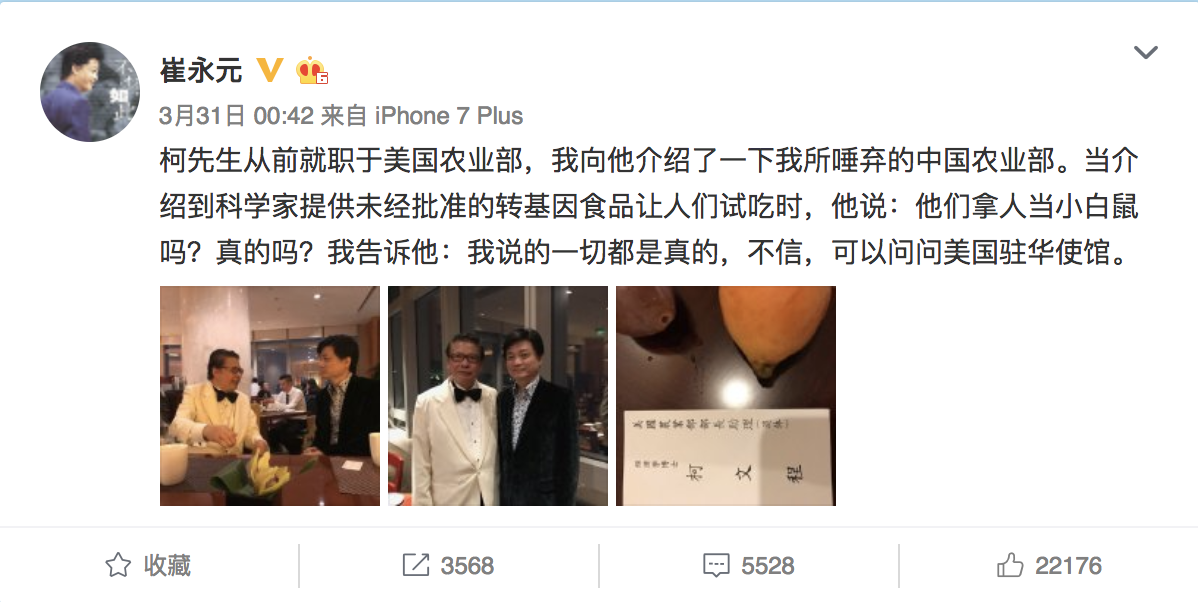

In [13]:
# 通过爬虫，获取了 @崔永元 发布的这一条微博下的所有转发信息，包括转发用户、转发文本、点赞数量、转发时间、转发客户端
IPython.display.Image('source.png', width=700)

In [14]:
# 用Pandas包读取Excel中的数据
# NumPy, SciPy, Pandas
# Pandas是一个功能非常强大的科学计算库，所有操作都可以在http://pandas.pydata.org/pandas-docs/stable/上找到答案
import pandas as pd
source = pd.read_excel('cyy.xlsx', sheet_name='Sheet1', header=0)
source.head(10)

,retweetUser,retweetContent,praise,time,device
0,@大海20172017,转发微博,赞[0],今天03:49,微博weibo.com
1,@益民1985,转发微博,赞[0],11月13日19:55,iPhone客户端
2,@用户5352510933,转发微博,赞[0],11月13日05:29,荣耀畅玩4X·快科技
3,@土生广东人,//@陈雪娴的微博: //@我是爱的天使://@坐看风云起1234://@高高的白杨-e:/...,赞[1],11月11日21:23,微博weibo.com
4,@马金涛呢,中国人害中国人666,赞[0],11月11日18:58,小米6拍人更美
5,@陈雪娴的微博VM,//@我是爱的天使://@坐看风云起1234://@高高的白杨-e://@lillian_d...,赞[0],11月11日13:21,OPPOR9
6,@我是爱的天使,//@坐看风云起1234://@高高的白杨-e://@lillian_danny:一个这么知...,赞[1],11月11日08:46,Android客户端
7,@坐看风云起1234,//@高高的白杨-e://@lillian_danny:一个这么知名的主持人，明明前途似锦，...,赞[0],11月11日07:33,iPhone客户端
8,@坐看风云起1234,//@高高的白杨-e:[伤心]//@烧猪肉炆荷兰豆:送上去！http://t.cn/R6hK...,赞[0],11月11日07:33,iPhone客户端
9,@坐看风云起1234,//@江帆猎鹰86176://@高高的白杨-e://@lillian_danny:一个这么知...,赞[0],11月11日07:33,iPhone客户端


In [15]:
# 查看导入后的数据格式、维度、每一列的数据类型(dtype)
print source.shape
for col in source.columns:
    print source[col].dtype,

(2766, 5)
object object object object object


In [16]:
# 如果用户直接转发消息，微博系统自动添加“转发微博”，可以过滤出有多少人直接转发源消息而不加入自己的转发内容
# 需要注意'retweetContent'中的每一行末尾都带了一个空格，需要消除
print type(source['retweetContent'])
print source['retweetContent'][0]
print len(source['retweetContent'][0])

<class 'pandas.core.series.Series'>
转发微博 
5


In [17]:
# 去除段尾空格的函数再进行过滤
def trim(s):
    return s.strip()
source[source['retweetContent'].apply(trim) == u'转发微博'].shape

(1554, 5)

In [18]:
# 对转发文本进行长度统计，在dataframe中生成新列“length”
source['retweetContent'] = source['retweetContent'].apply(trim)
# lambda
source['length'] = source['retweetContent'].apply(lambda x: len(x))
source.head()

,retweetUser,retweetContent,praise,time,device,length
0,@大海20172017,转发微博,赞[0],今天03:49,微博weibo.com,4
1,@益民1985,转发微博,赞[0],11月13日19:55,iPhone客户端,4
2,@用户5352510933,转发微博,赞[0],11月13日05:29,荣耀畅玩4X·快科技,4
3,@土生广东人,//@陈雪娴的微博: //@我是爱的天使://@坐看风云起1234://@高高的白杨-e:/...,赞[1],11月11日21:23,微博weibo.com,128
4,@马金涛呢,中国人害中国人666,赞[0],11月11日18:58,小米6拍人更美,10


In [19]:
# 对转发文本列进行分词，在dataframe中生成新列“tokens”
# 导入自定义词典、设置停用词列表，暂不理会词性，因为分完词后可以更加方便地提取词性
# 由于PyNLPIR存在bug，建议在每一段没有标点结束的文本末尾添加一个句号（在停用词表中可去除句号因此不影响分词精度），
# 否则自定义词典可能失效
pynlpir.nlpir.ImportUserDict('user_dict.txt')

# 停用词表中是较为常见的符号
stopwords = [u' ', u'\t', u'\n', u',', u'//', u',', u'...', 
             u'，', u'。', u'.', u'?', u'？', u'!', u'…', u'！', 
             u'/', u'"', u'“', u"”", u'【', u'】', u'~']

# 因为':'经常出现在'@userName'之后，用空格代替':'可以在PyNLPIR分析微博的原始基础上继续提升精度
def tokenize(s):
    # \t 转义字符 = tab \n
    return '\t'.join([word for word in pynlpir.segment(s.replace(':', ' ') + u'。', pos_tagging=False) 
                      if word not in stopwords])

source['tokens'] = source['retweetContent'].apply(tokenize)
source.head()

,retweetUser,retweetContent,praise,time,device,length,tokens
0,@大海20172017,转发微博,赞[0],今天03:49,微博weibo.com,4,转发微博
1,@益民1985,转发微博,赞[0],11月13日19:55,iPhone客户端,4,转发微博
2,@用户5352510933,转发微博,赞[0],11月13日05:29,荣耀畅玩4X·快科技,4,转发微博
3,@土生广东人,//@陈雪娴的微博: //@我是爱的天使://@坐看风云起1234://@高高的白杨-e:/...,赞[1],11月11日21:23,微博weibo.com,128,@陈雪娴的微博\t@我是爱的天使\t@坐看风云起1234\t@高高的白杨-e\t@lilli...
4,@马金涛呢,中国人害中国人666,赞[0],11月11日18:58,小米6拍人更美,10,中国\t人\t害\t中国\t人\t666


### 词语共现
- 共现能够找出与某些词存在关联的词汇，输出结果带有权重，权重越高，表示某词汇与目标词汇在语料中共同出现的比例越高
- 输出结果可以保存为三元组，再利用 D3\.js/UCINET/Gephi/Cytoscape 等软件进行（交互）网络图的绘制

In [20]:
# 需要注意到一条转发内容中可能存在多个相同词汇
# s就是tokens的每一行，cutsomStr我要查询的词语
def findNeigh(s, customStr):
    d = dict()
    if customStr in s:
        s = s.replace(customStr, '')
        for i in s.split('\t'): # s.split('\t')是一个列表
            if i not in stopwords:
                if i in d.keys():
                    d[i] += 1
                else:
                    d[i] = 1
    return d

In [22]:
from collections import defaultdict
# 输入
targetWord = raw_input()
dictWeight = defaultdict(int)
results = source['tokens'].apply(findNeigh, args = (targetWord.decode('utf-8'),))
# print results

for result in results:
    if len(result) > 0:
        for item in result.items():
            dictWeight[item[0]] += item[1]
# print dictWeight

for i in sorted(dictWeight.items(), key=lambda x: x[1], reverse=True):
    if len(i[0]) > 1 and i[1] >= 10 and pynlpir.segment(i[0], pos_tagging=True, pos_english=False)[0][1] == u'形容词':
        print i[0], i[1]

转基因
危险 96
卖力 52
安全 34
清楚 11


### 文本聚类

- 常见的聚类
    - 根据样本/变量之间的亲疏关系，将相近的样本/变量归为一类，差别较大的归为另一类
    - 亲疏关系的判别：相似性与距离（不相似性）
    - 主要适用场景：产品/市场细分、人群分类
    - 主要方法（以样本为例）
        - 系统聚类：每个样本各视为一类，根据类与类之间的距离/相似程度，将最相似的类进行合并，再计算新类与其他类之间的相似程度，继续合并，不断重复，直到所有样本都合并为一类
        - k-Means聚类：首先按照一定方法选取一批聚类中心，让样本向最近的聚心凝聚，按照最近距离原则不断修改不合理分类，直到合理为止
    - 距离与相似性测度
        - 距离：每个样本都是p（p=变量个数）维空间中的一个点，测度方式包括：绝对值距离、欧式距离、明式距离、切比雪夫距离
        - 相似性：夹角余弦、皮尔逊相关系数
    - 聚类检验方法：Ward（离差平方和）法，如果类聚得合理，那么同类样本的离差平方和应该较小，而类与类之间的离差平方和应该较大，也即努力寻找局部最优解

---

- 文本聚类
    - 与常见的聚类原理一致，但是需要寻找出“变量”的等价代替，一般来说，将词语(term/token)作为变量
    - 词语（变量）的取值可以是词频，也可以是其他指标，如TF-IDF值
    - 主要适用场景
        - 通过对用户的评价和讨论进行聚类，可以发现多个意见子群，从而探寻#话题#和典型意见
        - 对文档进行聚类可以发现文档中隐含的主题，当然更推荐使用主题模型来发掘主题

- 使用[Scikit-learn](http://scikit-learn.org/stable/index.html)：Python中完成机器学习项目的库
- 主要步骤
    1. 数据准备：对于监督类任务，需要的数据集包括 X[样本数、特征数] 和 Y[标签数] ；对于无监督类任务，只需要 X
    2. 使用Scikit-learn中的对应算法类(class)生成估计器(estimator)，这一步需要设置模型参数
    3. 调用估计器中的fit(x, y)函数对输入的数据进行学习，从而得到学习/训练后的模型
    4. 通过predict函数对未知数据进行预测
- 聚类是非监督类任务，也不需要对未知数据进行预测（注意和分类的区别），主要目的是为发现数据中的潜在结构
- 建议在导入sklearn前在命令行中输入`conda upgrade scikit-learn`安装或升级一些必要的依赖库，避免报错

In [23]:
# CountVectorizer将文档转换为词频矩阵，矩阵的行 = 文档数量，列 = 词语/特征数量
# 对于英文而言，处理步骤会更加简单，进行矩阵转换时方法比较直接
# 对于中文而言，对分词质量有更高的要求，且需要用空格来分隔每个词汇，甚至需要根据矩阵转换后的维数量进行回溯或二次处理
from sklearn.feature_extraction.text import CountVectorizer
# PCA: 使用主成分分析用来降维
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

In [24]:
# 分词后的特征数量、出现最多的词语
wordStat = defaultdict(int)

for word in source['tokens']:
    if '\t' not in word:
        wordStat[word] += 1
    else:
        for i in word.split('\t'):
            wordStat[i] += 1
print len(wordStat.keys())

3656


In [25]:
# 利用正则表达式去除@userName，因为用户名称分析价值较低
import re
pattern = re.compile(r'@\S+')

def removeName(s):
    if u'\t' in s:
        new_s = pattern.sub('', s.replace('\t', ' '))
    else:
        new_s = s
    return new_s

In [26]:
source['tokens'] = source['tokens'].apply(removeName)
source.head()

,retweetUser,retweetContent,praise,time,device,length,tokens
0,@大海20172017,转发微博,赞[0],今天03:49,微博weibo.com,4,转发微博
1,@益民1985,转发微博,赞[0],11月13日19:55,iPhone客户端,4,转发微博
2,@用户5352510933,转发微博,赞[0],11月13日05:29,荣耀畅玩4X·快科技,4,转发微博
3,@土生广东人,//@陈雪娴的微博: //@我是爱的天使://@坐看风云起1234://@高高的白杨-e:/...,赞[1],11月11日21:23,微博weibo.com,128,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难...
4,@马金涛呢,中国人害中国人666,赞[0],11月11日18:58,小米6拍人更美,10,中国 人 害 中国 人 666


In [27]:
# 利用正则表达式去除英文
pattern = re.compile(r'\w+')
def removeEng(s):
    new_s = pattern.sub('', s)
    return new_s

In [28]:
source['tokens'] = source['tokens'].apply(removeEng)
source.iloc[15:20, :]

,retweetUser,retweetContent,praise,time,device,length,tokens
15,@布衣神相V,//@开着奔驰去放羊3://@高高的白杨-e://@lillian_danny:一个这么知名...,赞[0],11月10日17:18,Android客户端,106,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又...
16,@阳羡农夫老陈7,小崔好样的[赞]//@傲晴凝阳://@刘_希春://@高高的白杨-e:[伤心]//@烧猪肉炆...,赞[0],11月10日16:44,iPhone6,73,小崔 好样的 [赞] [伤心] 送 上 去 ./
17,@刘_希春,//@高高的白杨-e:[伤心]//@烧猪肉炆荷兰豆:送上去！http://t.cn/R6hKnu2,赞[0],11月10日16:33,华为手机畅享玩不停,49,[伤心] 送 上 去 ./
18,@开着奔驰去放羊3,//@高高的白杨-e://@lillian_danny:一个这么知名的主持人，明明前途似锦，...,赞[2],11月10日16:16,iPhone客户端,94,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又 ...
19,@开着奔驰去放羊3,[悲伤]//@高高的白杨-e:[伤心]//@烧猪肉炆荷兰豆:送上去！http://t.cn/...,赞[2],11月10日16:16,iPhone客户端,53,[悲伤] [伤心] 送 上 去 ./


In [29]:
# 可以发现还存在'./'，这是原链接中尚未被匹配掉的部分
def removeRes(s):
    return s.replace('./', '')

In [30]:
source['tokens'] = source['tokens'].apply(removeRes)
source.iloc[15:20, :]

,retweetUser,retweetContent,praise,time,device,length,tokens
15,@布衣神相V,//@开着奔驰去放羊3://@高高的白杨-e://@lillian_danny:一个这么知名...,赞[0],11月10日17:18,Android客户端,106,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又...
16,@阳羡农夫老陈7,小崔好样的[赞]//@傲晴凝阳://@刘_希春://@高高的白杨-e:[伤心]//@烧猪肉炆...,赞[0],11月10日16:44,iPhone6,73,小崔 好样的 [赞] [伤心] 送 上 去
17,@刘_希春,//@高高的白杨-e:[伤心]//@烧猪肉炆荷兰豆:送上去！http://t.cn/R6hKnu2,赞[0],11月10日16:33,华为手机畅享玩不停,49,[伤心] 送 上 去
18,@开着奔驰去放羊3,//@高高的白杨-e://@lillian_danny:一个这么知名的主持人，明明前途似锦，...,赞[2],11月10日16:16,iPhone客户端,94,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又 ...
19,@开着奔驰去放羊3,[悲伤]//@高高的白杨-e:[伤心]//@烧猪肉炆荷兰豆:送上去！http://t.cn/...,赞[2],11月10日16:16,iPhone客户端,53,[悲伤] [伤心] 送 上 去


In [31]:
# 建构模型
vectorizer = CountVectorizer(input='content')
# 拟合数据，返回词语-文档矩阵（TDM）
dtm = vectorizer.fit_transform(source['tokens'])
# 获取特征，并且给特征赋予ID
vocab = vectorizer.get_feature_names()
# 将矩阵转换成数组，适合用NumPy进行处理
dtmArray = dtm.toarray()
vocab = np.array(vocab)
print len(vocab)

2315


In [32]:
dtmArray.shape

(2766, 2315)

In [33]:
# 可以更方便地查看任何一个词在整体文档中，每份文档中的出现频数
print np.sum(dtmArray[:,vocab == u'转基因'])

510


In [34]:
%%time
# 从文档中共提取了2315项特征，可以适当减少特征数目
# 输入浮点数，表示希望保存的方差贡献率
pca = PCA(n_components=0.9)
# 拟合数组
pca_model = pca.fit(dtmArray)
# 查看保留的主成分数量
pca_model.n_components_

CPU times: user 22.4 s, sys: 314 ms, total: 22.7 s
Wall time: 5.93 s


In [35]:
# 对数据应用PCA变换，实现降维
dtmArray_pca = pca_model.transform(dtmArray)
dtmArray_pca.shape

(2766, 181)

#### 方法1
---
使用k-Means聚类，需要自行指定聚类数量

In [36]:
n_clusters = 5

In [37]:
kmeans = KMeans(n_clusters=n_clusters).fit(dtmArray_pca)
# 在数据中生成新列'kmeans_cluster'，容纳类别标签
source['kmeans_cluster'] = kmeans.labels_

In [38]:
source.head(20)

,retweetUser,retweetContent,praise,time,device,length,tokens,kmeans_cluster
0,@大海20172017,转发微博,赞[0],今天03:49,微博weibo.com,4,转发微博,0
1,@益民1985,转发微博,赞[0],11月13日19:55,iPhone客户端,4,转发微博,0
2,@用户5352510933,转发微博,赞[0],11月13日05:29,荣耀畅玩4X·快科技,4,转发微博,0
3,@土生广东人,//@陈雪娴的微博: //@我是爱的天使://@坐看风云起1234://@高高的白杨-e:/...,赞[1],11月11日21:23,微博weibo.com,128,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难...,0
4,@马金涛呢,中国人害中国人666,赞[0],11月11日18:58,小米6拍人更美,10,中国 人 害 中国 人,0
5,@陈雪娴的微博VM,//@我是爱的天使://@坐看风云起1234://@高高的白杨-e://@lillian_d...,赞[0],11月11日13:21,OPPOR9,117,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 ...,0
6,@我是爱的天使,//@坐看风云起1234://@高高的白杨-e://@lillian_danny:一个这么知...,赞[1],11月11日08:46,Android客户端,107,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又...,0
7,@坐看风云起1234,//@高高的白杨-e://@lillian_danny:一个这么知名的主持人，明明前途似锦，...,赞[0],11月11日07:33,iPhone客户端,94,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又 ...,0
8,@坐看风云起1234,//@高高的白杨-e:[伤心]//@烧猪肉炆荷兰豆:送上去！http://t.cn/R6hKnu2,赞[0],11月11日07:33,iPhone客户端,49,[伤心] 送 上 去,0
9,@坐看风云起1234,//@江帆猎鹰86176://@高高的白杨-e://@lillian_danny:一个这么知...,赞[0],11月11日07:33,iPhone客户端,107,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又...,0


In [41]:
# 从每个类别中提取出至多20个关键词
cluster = defaultdict(int)
for token in source[source['kmeans_cluster'] == 0]['tokens']:
    cluster[token.replace(' ', '')] += 1

combineText = ''
for item in sorted(cluster.items(), key = lambda x: x[1], reverse=True):
    combineText += item[0]
    
for keyword in pynlpir.get_key_words(combineText, max_words = 20, weighted = True):
    print keyword[0], '\t', keyword[1]

回复 	63.89
崔老师 	39.6
中国 	36.84
转基因 	35.58
崔哥 	34.93
崔永元 	34.57
小崔 	33.71
农业部 	33.13
小白鼠 	32.45
老崔 	25.35
问题 	24.65
国家 	24.53
转发 	22.36
支持 	21.47
可以 	21.19
现在 	19.59
美国 	18.6
政府 	17.67
就是 	17.0
特供 	16.94


- 为了检验聚类效果，使用轮廓系数指标（silhouette score），该指标测量了聚类结果中每个类的内部凝聚程度与类间的疏离程度
    - The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
    - 轮廓系数取值介于[-1, 1]，越靠近0表示类别存在重叠，负值表示聚类结果有较大误差，好的聚类结果对应的轮廓稀疏应该为正数，且越接近1越好

In [42]:
metrics.silhouette_score(dtmArray_pca, 
                         kmeans.labels_, 
                         metric = 'euclidean', # 计算距离的方法
                         sample_size = dtmArray_pca.shape[0])

0.65686455700232893

- 可以根据轮廓系数对聚类中的参数进行调整
- 当然更加良好的方法是对从全体数据中选择一部分数据作为子集，人工进行分类，然后对比机器学习的结果与人工标注结果，生成交叉表，可以看出效果最好的类和比较混杂的类

#### 方法2
---
- k-Means中使用的是欧式距离，当然考虑到语料中每段文本的长度不一致，可以使用余弦相似性配合层次聚类来与k-Means的聚类结果进行对比

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
ac = AgglomerativeClustering(n_clusters=n_clusters, 
                             affinity='cosine', # 类同/距离测量方式：欧式/曼哈顿/余弦/预先计算距离
                             linkage='average').fit(dtmArray_pca) # 计算两个类间距离的方式：average表示计算两个类中每对样本距离的均值
# 在数据中生成新列'ac_cluster'，容纳类别标签
source['ac_cluster'] = ac.labels_

In [45]:
source.head(10)

,retweetUser,retweetContent,praise,time,device,length,tokens,kmeans_cluster,ac_cluster
0,@大海20172017,转发微博,赞[0],今天03:49,微博weibo.com,4,转发微博,0,4
1,@益民1985,转发微博,赞[0],11月13日19:55,iPhone客户端,4,转发微博,0,4
2,@用户5352510933,转发微博,赞[0],11月13日05:29,荣耀畅玩4X·快科技,4,转发微博,0,4
3,@土生广东人,//@陈雪娴的微博: //@我是爱的天使://@坐看风云起1234://@高高的白杨-e:/...,赞[1],11月11日21:23,微博weibo.com,128,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难...,0,1
4,@马金涛呢,中国人害中国人666,赞[0],11月11日18:58,小米6拍人更美,10,中国 人 害 中国 人,0,0
5,@陈雪娴的微博VM,//@我是爱的天使://@坐看风云起1234://@高高的白杨-e://@lillian_d...,赞[0],11月11日13:21,OPPOR9,117,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 ...,0,1
6,@我是爱的天使,//@坐看风云起1234://@高高的白杨-e://@lillian_danny:一个这么知...,赞[1],11月11日08:46,Android客户端,107,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又...,0,1
7,@坐看风云起1234,//@高高的白杨-e://@lillian_danny:一个这么知名的主持人，明明前途似锦，...,赞[0],11月11日07:33,iPhone客户端,94,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又 ...,0,1
8,@坐看风云起1234,//@高高的白杨-e:[伤心]//@烧猪肉炆荷兰豆:送上去！http://t.cn/R6hKnu2,赞[0],11月11日07:33,iPhone客户端,49,[伤心] 送 上 去,0,0
9,@坐看风云起1234,//@江帆猎鹰86176://@高高的白杨-e://@lillian_danny:一个这么知...,赞[0],11月11日07:33,iPhone客户端,107,一个 这么 知名 的 主持人 明明 前途似锦 为什么 偏偏 走 这么 一 条 艰难 又...,0,1


In [46]:
# 计算轮廓系数
metrics.silhouette_score(dtmArray_pca, 
                         ac.labels_, 
                         metric = 'cosine', # 计算距离的方法
                         sample_size = dtmArray_pca.shape[0])

0.65787428857925512

#### 总结
---
- 以上的聚类方法虽然有效，但是忽略了词语之间的内在联系与语义结构，也即未考虑文法和词的顺序
- 更为有效的聚类不仅需要关注文本的相似性，还应该上升到语义接近层面，譬如基于Word2Vec(词向量)的聚类、词嵌入方法等

In [47]:
# 最后，请记住关闭PyNLPIR API，防止占用内存以及下次调用出现错误
pynlpir.close()